 <h1>Including Necessary libraries</h1>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle



<h1>Importing Dataset</h1>

In [36]:
# reading data from excel sheet
soil_data = pd.read_excel('soil_data.xlsx',header=None)

# Viewing first few rows of dataset
soil_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Metadata - Soils Collection and Lab (Kuo) Anal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sample,DIR.,INT/EXT,Sub- Sample #,Date,Time,Latitude,Longitude,Slope,Aspect,...,B (ppm),Organic Matter %,pH,Zn (ppm),Cu (ppm),Fe (ppm),Ca (meq/100g),Mg (meq/100g),Na (meq/100g),NaN
2,1,NW,INT,1,2012-06-04 00:00:00,13:50:00,N25.77485,W171.73539,2,92,...,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12,NaN
3,2,NW,INT,2,2012-06-04 00:00:00,14:43:00,N25.77774,W171.73643,1,167,...,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07,NaN
4,3,NW,INT,3,2012-06-04 00:00:00,14:10:00,N25.77628,W171.73480,5,75,...,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Longitude,Longitude for sample location in decimal degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,Slope,"Slope of the ground at sample location, in deg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Aspect,"Directoin the slope face at sample location, i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,% Veg. Cover,Percent vegetative cover of the 102m area surr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Preprocessing Data</h1>

In [37]:
column_names = soil_data.columns.tolist()
print(column_names)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [38]:
# removing unnecessary columns and rows that do not contains data
soil_data = soil_data.drop(np.arange(410,422),axis=0)
soil_data = soil_data.drop([0,1],axis=0)
soil_data = soil_data.drop(np.arange(0,10),axis=1)

#renaming column names and units of each attributes
column_names = ['Vegetation Cover','NO3','NH4','P','K','SO4',
                'B','Organic Matter','pH','Zn','Cu','Fe','Ca','Mg','Na']
attribute_units = ['%age','ppm','ppm','ppm','ppm','ppm','ppm',
                "%",'pH','ppm','ppm','ppm','meq/100g','meq/100g','meq/100g']

#creating new dataframe with column name
soil_data = pd.DataFrame(soil_data.values,columns=column_names)

#viewing final data frame
soil_data.head()

AssertionError: Number of manager items must equal union of block items
# manager items: 15, # tot_items: 16

In [39]:
soil_data.isna().sum()

10     13
11     14
12      3
13      6
14      5
15      1
16      3
17      2
18      3
19      5
20      1
21      1
22      2
23      0
24      6
25    408
dtype: int64

In [40]:
soil_data.fillna(0)

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
2,100,23.00,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12,0.0
3,95,6.00,0.75,58,10,7,0.27,0.30,8.2,0.8,0.1,1,5.0,0.5,0.07,0.0
4,98,7.25,1.00,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04,0.0
5,100,21.00,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.10,0.0
6,15,1.75,0.50,17,4,6,0.25,0.10,8.8,0.3,0.1,1,4.7,0.5,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,35,16.50,1.25,61,21,9,0.37,0.64,7.8,0.9,0.2,1,4.9,0.4,0.12,0.0
406,35,8.00,2.25,61,7,6,0.28,0.82,8.0,0.8,0.2,1,5.1,0.3,0.10,0.0
407,35,3.75,1.25,51,5,5,0.14,0.54,8.2,0.4,0.1,1,5.0,0.3,0.09,0.0
408,35,0.00,1.00,48,6,4,0.14,0.36,8.2,0.4,0.1,1,5.2,0.3,0.07,0.0


In [41]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=nan, strategy='median')
# transform the dataset
transformed_values = imputer.fit_transform(soil_data)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


C:\Users\ishib\anaconda3\lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: [15]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [42]:
soil_data= pd.DataFrame(transformed_values,columns=column_names)
soil_data.isna().sum()

Vegetation Cover    0
NO3                 0
NH4                 0
P                   0
K                   0
SO4                 0
B                   0
Organic Matter      0
pH                  0
Zn                  0
Cu                  0
Fe                  0
Ca                  0
Mg                  0
Na                  0
dtype: int64

<h1>Saving the Preprocessed Data set</h1>

In [43]:
soil_data.to_csv(r'processed_data_set.csv', index=False)

In [44]:
# printing minimum values for each column in the dataset
min_values=soil_data.min()
print(min_values)

Vegetation Cover     1.00
NO3                  0.25
NH4                  0.25
P                   10.00
K                    4.00
SO4                  4.00
B                    0.07
Organic Matter       0.01
pH                   7.40
Zn                   0.10
Cu                   0.10
Fe                   1.00
Ca                   4.20
Mg                   0.30
Na                   0.03
dtype: float64


In [45]:
# printing maximum values for each column in the dataset
max_values=soil_data.max()
print(max_values)

Vegetation Cover    100.00
NO3                 633.75
NH4                  14.25
P                   171.00
K                   164.00
SO4                 258.00
B                    17.46
Organic Matter        4.46
pH                    8.80
Zn                   10.00
Cu                    1.30
Fe                    4.00
Ca                   12.50
Mg                    6.30
Na                    8.22
dtype: float64


<h1>Data Visualization</h1>

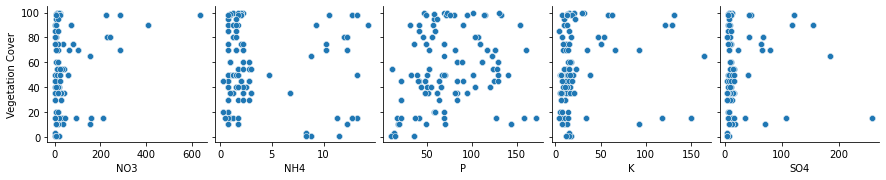

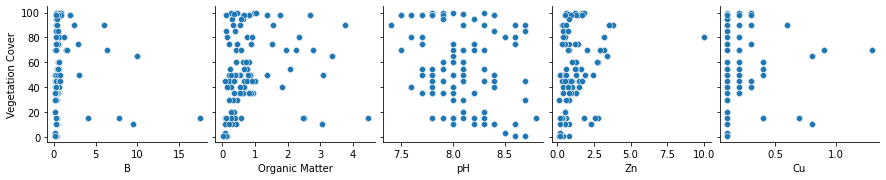

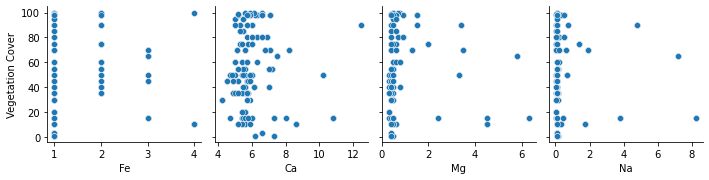

<AxesSubplot:>

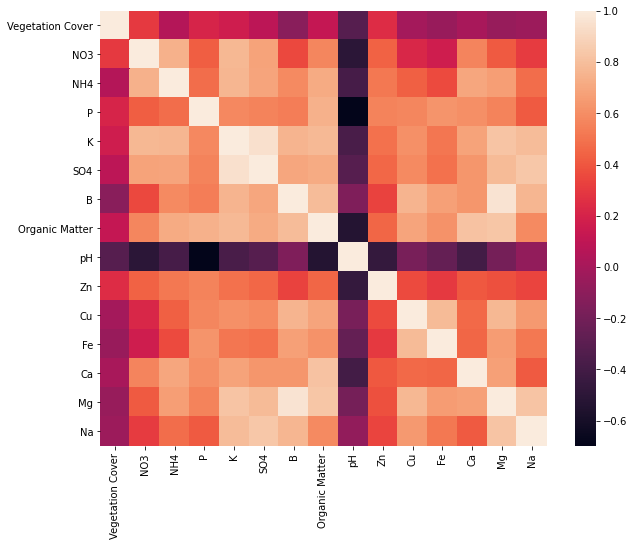

In [46]:
import seaborn as sns

#pair plots
pairplot1 = sns.pairplot(soil_data,x_vars=soil_data.columns[1:6],y_vars=['Vegetation Cover'])
plt.show()

pairplot2 = sns.pairplot(soil_data,x_vars=soil_data.columns[6:11],y_vars=['Vegetation Cover'])
plt.show()

pairplot3 = sns.pairplot(soil_data,x_vars=soil_data.columns[11:15],y_vars=['Vegetation Cover'])
plt.show()

# getting coeralation values
values = soil_data.corr()
# plotting values
plt.figure(figsize=(10,8))
sns.heatmap(values,annot=False)

<h1>Visualizing result of corelation matrix</h1>

It is clear from above matrix that Vegetation Cover is highly depends on pH.

 <h1>Reading processed data</h1>

In [47]:
import pandas as pd
import numpy as np


X, Y = soil_data[soil_data.columns[1:]], soil_data['Vegetation Cover']


print(X[:10])
print(X)
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X, Y = scaler.fit_transform(X.values), scaler.fit_transform(Y.values.reshape(-1,1))
print(X[0])

     NO3   NH4      P     K   SO4     B  Organic Matter   pH   Zn   Cu   Fe  \
0  23.00  2.25  101.0  32.0  12.0  0.71            0.96  7.8  1.7  0.3  4.0   
1   6.00  0.75   58.0  10.0   7.0  0.27            0.30  8.2  0.8  0.1  1.0   
2   7.25  1.00  115.0   8.0  10.0  0.56            0.62  7.9  1.4  0.2  2.0   
3  21.00  1.25  130.0  30.0  13.0  0.78            1.04  7.9  1.8  0.3  2.0   
4   1.75  0.50   17.0   4.0   6.0  0.25            0.10  8.8  0.3  0.1  1.0   
5   2.00  0.75   40.0   8.0   6.0  0.24            0.22  8.3  0.9  0.1  1.0   
6   1.50  0.25   21.0  12.0   5.0  0.20            0.08  8.7  0.3  0.1  1.0   
7  14.75  0.75   53.0  12.0   8.0  0.18            0.41  8.3  0.8  0.1  1.0   
8  12.75  2.00   72.0  15.0  10.0  0.64            0.45  8.0  1.2  0.2  2.0   
9  18.50  1.75   47.0  21.0   7.0  0.29            0.28  8.3  0.6  0.1  1.0   

    Ca   Mg    Na  
0  6.6  0.8  0.12  
1  5.0  0.5  0.07  
2  5.2  0.4  0.04  
3  6.1  0.7  0.10  
4  4.7  0.5  0.10  
5  4.9  0.

<h1>Implementing ML models</h1>

<h3>Useful functions to implement a general model and validate data</h3>

In [48]:
from sklearn.metrics import r2_score,accuracy_score,classification_report

def train(model, X, Y):
    model.fit(X,Y)
    return model

def print_metrics(model):
    
    # predicted test data
    y_pred = model.predict(X_test)
    
    # Mean square Error
    mean_square_error = np.sum((y_pred-Y_test)**2)/len(y_pred)
    print('Mean Square Error : ', mean_square_error)
    
    print ("test_score" ,model.score(X_test, Y_test))
    print ("train_score ", model.score(X_train, Y_train))
    
   
    

In [49]:
from sklearn.model_selection import train_test_split
#Spliting data into train and test set<
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.10, random_state=43)
print(X_train)

[[0.04143646 0.17857143 0.33540373 ... 0.18072289 0.01666667 0.002442  ]
 [0.24309392 0.60714286 0.69565217 ... 0.39759036 0.91666667 0.87545788]
 [0.37963694 0.85714286 0.57763975 ... 0.3253012  0.1        0.05494505]
 ...
 [0.04459353 0.46428571 0.52795031 ... 0.18072289 0.03333333 0.01098901]
 [0.02209945 0.         0.30434783 ... 0.14457831 0.         0.001221  ]
 [0.06156275 0.10714286 0.26086957 ... 0.15662651 0.03333333 0.00610501]]


<h2>DecisionTreeRegressor</h2>

In [50]:

from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8, min_samples_leaf=5)

#training
treeRegressor = train(treeRegressor, X_train, Y_train)

#print metrics
print_metrics(treeRegressor)
#print(export_graphviz(treeRegressor))
with open('Decision Tree Regression','wb') as f:
  pickle.dump(treeRegressor,f)

y_pred = treeRegressor.predict(X_test)

Mean Square Error :  6.701650981317542
test_score 0.7049585582471801
train_score  0.8933416557767986


C:\Users\ishib\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


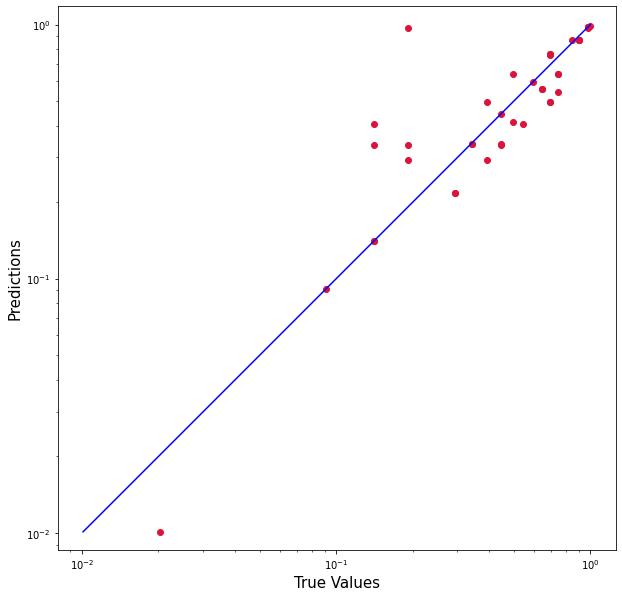

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_test))
p2 = min(min(y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<h2>Implement Random Forest Regressor</h2>

In [52]:
from sklearn.ensemble import RandomForestRegressor

forestRegressor = RandomForestRegressor(criterion='squared_error', max_depth=8, n_estimators=10, random_state=0)

#training 
forestRegressor = train(forestRegressor, X_train, Y_train)
#print metrics
print_metrics(forestRegressor)

with open('Random Forest Regression','wb') as f:
  pickle.dump(forestRegressor,f)


Mean Square Error :  6.111706101594929
test_score 0.9271976175217763
train_score  0.9631219562352241


C:\Users\ishib\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\ishib\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


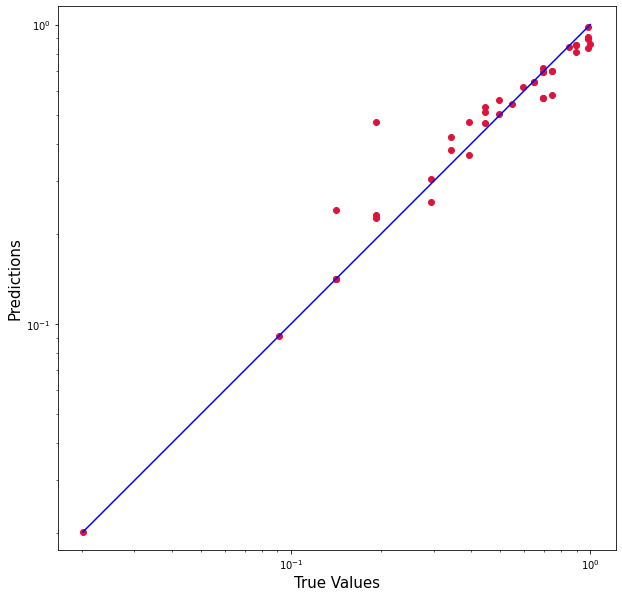

In [53]:
y_pred = forestRegressor.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_test))
p2 = min(min(y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Implementing Gradient Boosting Regressor

In [70]:
# Gradient Boosting Regressor parameters
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
GB_model= GradientBoostingRegressor(**params) 

#training 
GB_model = train(GB_model, X_train, Y_train)
#print metrics
print_metrics(GB_model)

Mean Square Error :  5.863625985486766
test_score 0.9394469675909205
train_score  0.9694946427007802


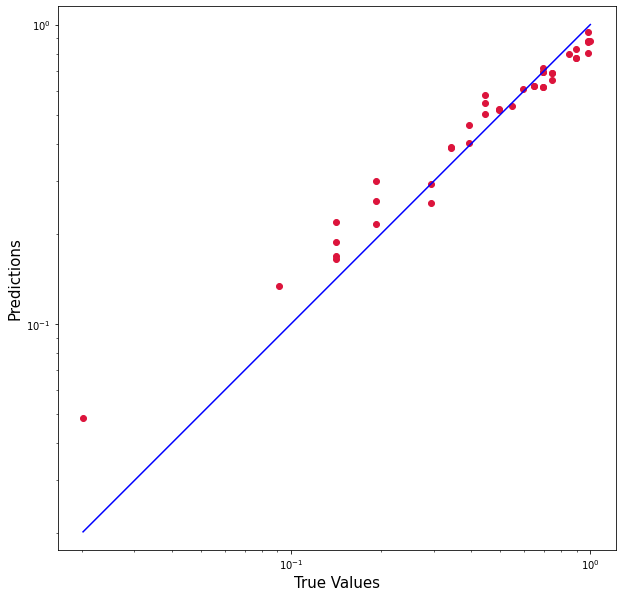

In [71]:
y_pred =GB_model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_test))
p2 = min(min(y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Implementing stacking

In [55]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define base regressors
forestRegressor = RandomForestRegressor(criterion='squared_error', max_depth=8, n_estimators=10, random_state=0)
treeRegressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8, min_samples_leaf=5)

# Gradient Boosting Regressor parameters
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
GB_model= GradientBoostingRegressor(**params) 

# Create StackingRegressor
stacking_regressor = StackingRegressor(
    regressors=[treeRegressor, forestRegressor, GB_model],
    meta_regressor=GB_model
)


In [56]:
#training 
stacking_regressor = train(stacking_regressor, X_train, Y_train)
#print metrics
print_metrics(stacking_regressor,)

C:\Users\ishib\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error :  6.773475592585466
test_score 0.9733331558850203
train_score  0.9988121322748305


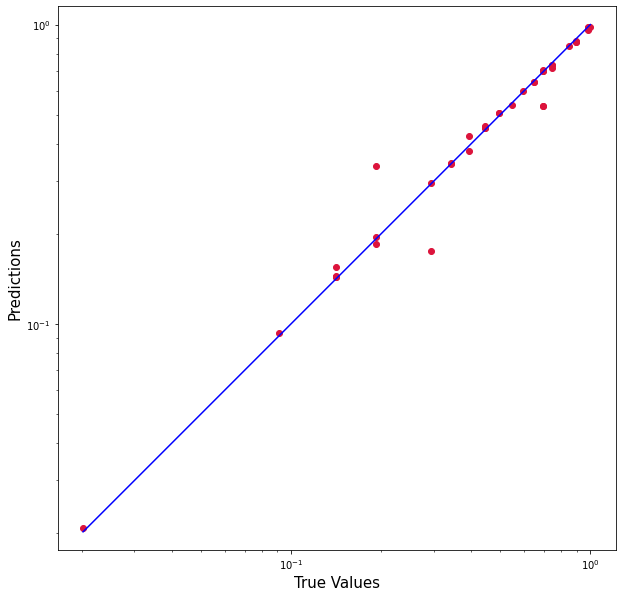

In [57]:
y_pred =stacking_regressor.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_test))
p2 = min(min(y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#  PLOTING OF MODEL R2_SCORES of training data and testing data as well as MSE scores


C:\Users\ishib\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ishib\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ishib\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


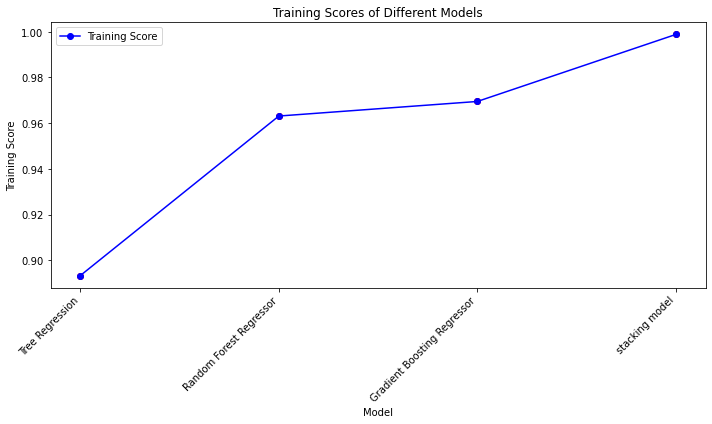

In [58]:

# Initialize models
models = {
    'Tree Regression': treeRegressor,
    'Random Forest Regressor': forestRegressor,
    'Gradient Boosting Regressor': GB_model,
    'stacking model':stacking_regressor
}

# Train models and collect training scores
training_scores = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    training_scores[name] = model.score(X_train, Y_train)


# Plotting
plt.figure(figsize=(10, 6))

# Plot line graph
plt.plot(training_scores.keys(), training_scores.values(), marker='o', label='Training Score', color='blue')

# Plot scatter points for training data
for name, score in training_scores.items():
    plt.scatter([name], [score], color='red')

plt.title('Training Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Training Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



C:\Users\ishib\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ishib\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ishib\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


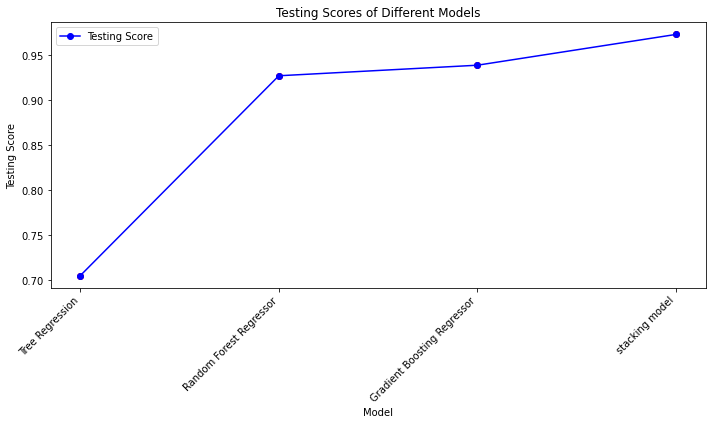

In [59]:

# Initialize models
models = {
    'Tree Regression': treeRegressor,
    'Random Forest Regressor': forestRegressor,
    'Gradient Boosting Regressor': GB_model,
    'stacking model':stacking_regressor
}

# Train models and collect training scores
training_scores = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    training_scores[name] = model.score(X_test, Y_test)


# Plotting
plt.figure(figsize=(10, 6))

# Plot line graph
plt.plot(training_scores.keys(), training_scores.values(), marker='o', label='Testing Score', color='blue')

# Plot scatter points for training data
for name, score in training_scores.items():
    plt.scatter([name], [score], color='red')

plt.title('Testing Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Testing Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Mean Square Error :  {'Tree Regression': 6.701650981317542}
Mean Square Error :  {'Tree Regression': 6.701650981317542, 'Random Forest Regressor': 6.111706101594929}


C:\Users\ishib\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ishib\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error :  {'Tree Regression': 6.701650981317542, 'Random Forest Regressor': 6.111706101594929, 'Gradient Boosting Regressor': 5.856666960355153}


C:\Users\ishib\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error :  {'Tree Regression': 6.701650981317542, 'Random Forest Regressor': 6.111706101594929, 'Gradient Boosting Regressor': 5.856666960355153, 'stacking model': 6.772686658495255}


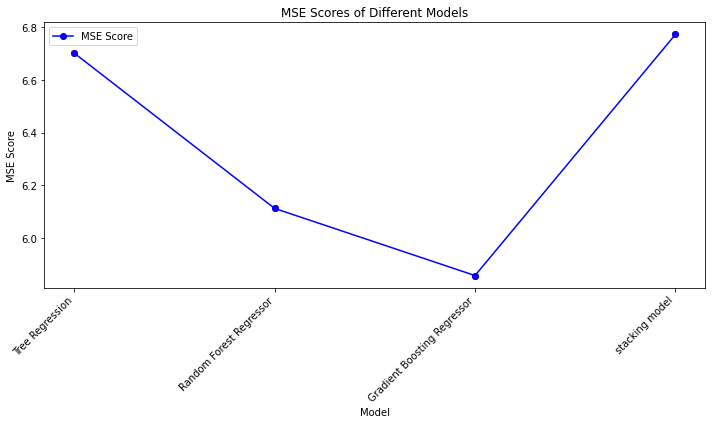

In [60]:

# Initialize models
models = {
    'Tree Regression': treeRegressor,
    'Random Forest Regressor': forestRegressor,
    'Gradient Boosting Regressor': GB_model,
    'stacking model':stacking_regressor
}

# Train models and collect training scores
mean_square_error= {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mean_square_error[name] = np.sum((y_pred-Y_test)**2)/len(y_pred)
    print('Mean Square Error : ', mean_square_error)


# Plotting
plt.figure(figsize=(10, 6))

# Plot line graph
plt.plot(mean_square_error.keys(), mean_square_error.values(), marker='o', label='MSE Score', color='blue')

# Plot scatter points for training data
for name, score in mean_square_error.items():
    plt.scatter([name], [score], color='red')

plt.title('MSE Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('MSE Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# TRUE VS PREDICTED VALUES

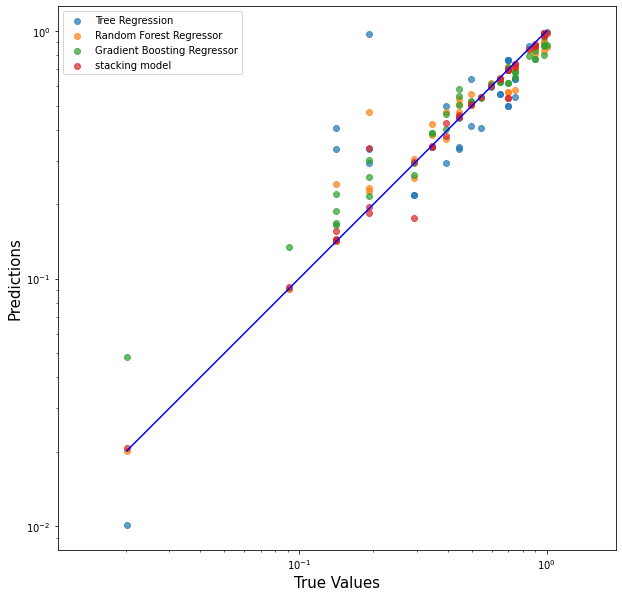

In [73]:
plt.figure(figsize=(10,10))

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    plt.scatter(Y_test, y_pred, label=model_name, alpha=0.7)

plt.yscale('log')
plt.xscale('log')

# Plotting a diagonal line
p1 = max(Y_test.max(), y_pred.max())
p2 = min(Y_test.min(), y_pred.min())
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend()
plt.show()

## RESIDUAL PLOT

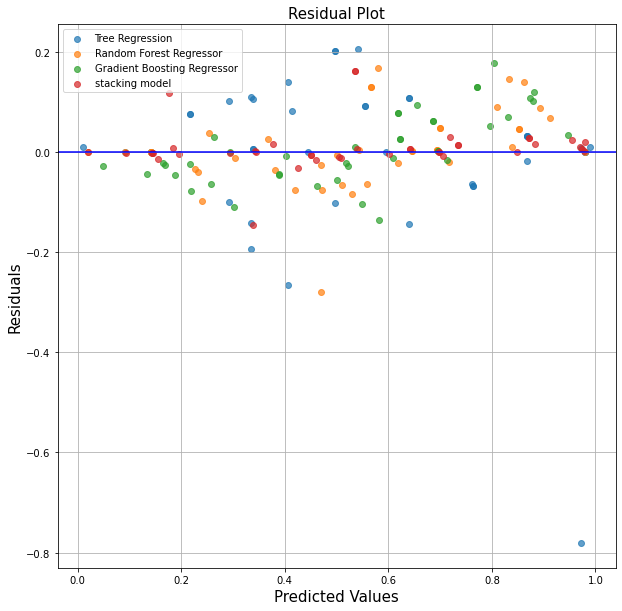

In [72]:
plt.figure(figsize=(10, 10))

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = Y_test.flatten() - y_pred
    
    plt.scatter(y_pred, residuals, label=model_name, alpha=0.7)

plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residual Plot', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()



##  Mean MSE and Std MSE COMPARISON

In [63]:
from sklearn.model_selection import KFold, cross_val_score
import warnings

num_folds = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
results_df = pd.DataFrame(columns=['Model', 'Mean MSE', 'Std MSE'])
# Suppress warnings
warnings.filterwarnings("ignore")

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    mean_mse = -cv_scores.mean()
    std_mse = cv_scores.std()
    results_df = results_df.append({'Model': model_name, 'Mean MSE': mean_mse, 'Std MSE': std_mse}, ignore_index=True)

# Display results DataFrame
print(results_df)

                         Model  Mean MSE   Std MSE
0              Tree Regression  0.020282  0.003708
1      Random Forest Regressor  0.009592  0.002801
2  Gradient Boosting Regressor  0.005752  0.002160
3               stacking model  0.002735  0.001893


## K-FOLD VISUALIZATION COMPARIZON BETWEEN MODELS & Mean MSE and Std MSE COMPARISON

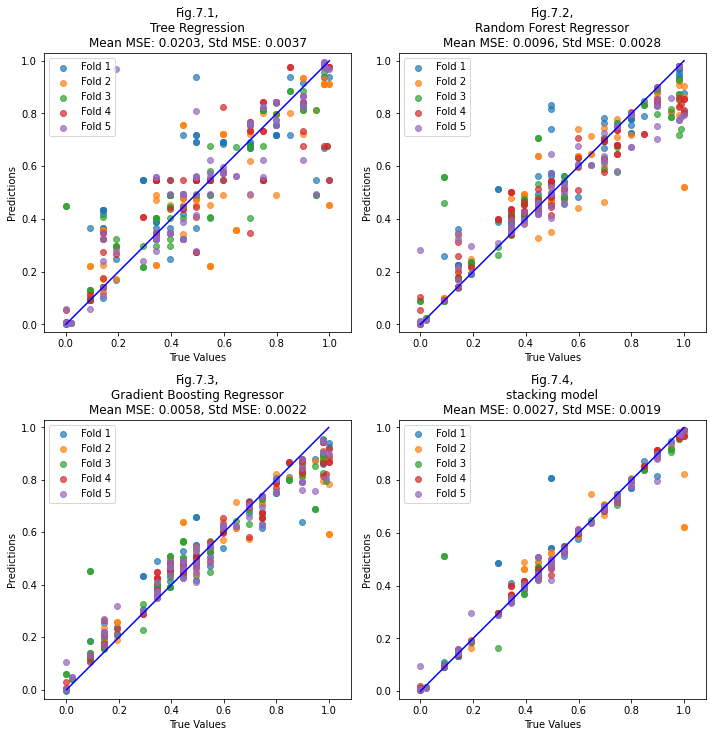

In [65]:
import matplotlib.pyplot as plt

fig_num = 7  # Starting figure number

plt.figure(figsize=(10, 15))

# Iterate over each model
for i, (model_name, model) in enumerate(models.items(), 1):  # Start enumerate from 1
    # Create a subplot for the current model
    plt.subplot(3, 2, i)
    
    # Iterate over each fold
    for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(X)):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        Y_train_fold, Y_test_fold = Y[train_idx], Y[test_idx]

        # Fit the model and make predictions
        model.fit(X_train_fold, Y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        # Plot the predictions against the true values for the current fold
        plt.scatter(Y_test_fold, y_pred_fold, label=f'Fold {fold_idx+1}', alpha=0.7)

    # Plotting a diagonal line
    p1 = max(Y_test_fold.max(), y_pred_fold.max())
    p2 = min(Y_test_fold.min(), y_pred_fold.min())
    plt.plot([p1, p2], [p1, p2], 'b-')

    # Get mean and standard deviation of MSE from results_df
    mean_mse = results_df.loc[results_df['Model'] == model_name, 'Mean MSE'].values[0]
    std_mse = results_df.loc[results_df['Model'] == model_name, 'Std MSE'].values[0]

    # Add labels and title for the current subplot with mean and standard deviation of MSE
    title = f'Fig.{fig_num}.{i},\n{model_name}\nMean MSE: {mean_mse:.4f}, Std MSE: {std_mse:.4f}'
    plt.title(title, fontsize=12)
    plt.xlabel('True Values', fontsize=10)
    plt.ylabel('Predictions', fontsize=10)
    plt.axis('equal')
    plt.legend()
    
# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


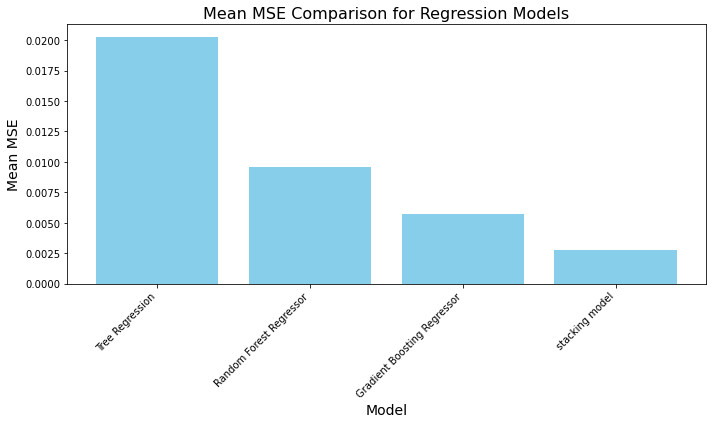

In [66]:
import matplotlib.pyplot as plt

# Extract model names and mean MSE values
model_names = results_df['Model']
mean_mse_values = results_df['Mean MSE']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_mse_values, color='skyblue')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean MSE', fontsize=14)
plt.title('Mean MSE Comparison for Regression Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Mean Square Error :  {'Tree Regression': 6.701650981317542, 'Random Forest Regressor': 6.111706101594929, 'Gradient Boosting Regressor': 5.857734676984285, 'stacking model': 6.772528060128373}
Root Mean Square Error :  {'Tree Regression': 2.588754716329367, 'Random Forest Regressor': 2.4721865021868656, 'Gradient Boosting Regressor': 2.4202757439978373, 'stacking model': 2.602408127125408}


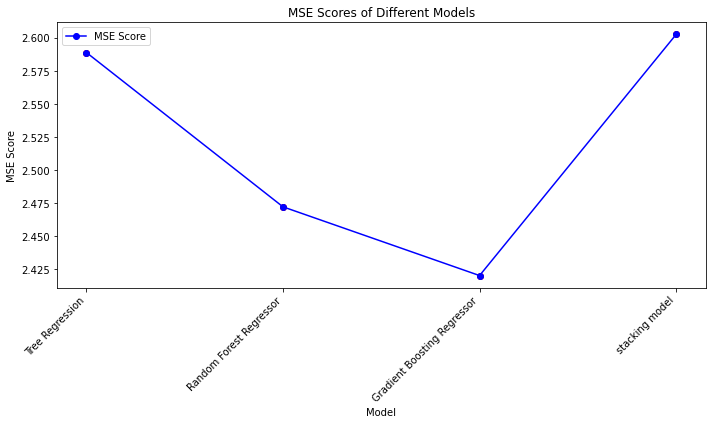

In [67]:
# Initialize models
models = {
    'Tree Regression': treeRegressor,
    'Random Forest Regressor': forestRegressor,
    'Gradient Boosting Regressor': GB_model,
    'stacking model':stacking_regressor
}

# Train models and collect training scores
mean_square_error= {}
rmse={}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mean_square_error[name] = np.sum((y_pred-Y_test)**2)/len(y_pred)
    mse=mean_square_error[name]
    
    # Calculate root mean square error
    rmse[name] = np.sqrt(mse)
    

print('Mean Square Error : ', mean_square_error)
print('Root Mean Square Error : ', rmse)
# Plotting
plt.figure(figsize=(10, 6))

# Plot line graph
plt.plot(rmse.keys(), rmse.values(), marker='o', label='MSE Score', color='blue')

# Plot scatter points for training data
for name, score in rmse.items():
    plt.scatter([name], [score], color='red')

plt.title('MSE Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('MSE Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [68]:

from tabulate import tabulate

# Assuming your DataFrame is named 'results_df'
table = tabulate(results_df, headers='keys', tablefmt='pretty')

print(table)

+---+-----------------------------+-----------------------+-----------------------+
|   |            Model            |       Mean MSE        |        Std MSE        |
+---+-----------------------------+-----------------------+-----------------------+
| 0 |       Tree Regression       | 0.020281972298671493  | 0.0037076498359033794 |
| 1 |   Random Forest Regressor   | 0.009592396006879344  | 0.0028011290130535937 |
| 2 | Gradient Boosting Regressor | 0.0057519377685217735 | 0.002159778397793526  |
| 3 |       stacking model        | 0.0027350326751144306 | 0.0018932042497346881 |
+---+-----------------------------+-----------------------+-----------------------+


In [69]:
# Assuming your DataFrame is named 'results_df'
with open('results_table.txt', 'w') as f:
    f.write(table)